## Regression with a Flood Prediction 

Flood prediction is a critical area for reducing the impacts of natural disasters and improving emergency management. In this study, a regression model for predicting flood events is developed. The aim is to predict future flood events using certain meteorological and environmental variables, thus helping relevant institutions to take preventive measures.

**Informatin About Columns**
* id: An identifier that uniquely identifies each observation.

* MonsoonIntensity: An indicator that measures the intensity of monsoon rainfall. This can be a measure of the amount or intensity of rainfall in a region.

* TopographyDrainage: Refers to the interaction of topographic features and drainage systems. This can affect how water moves across the surface.

* RiverManagement: Refers to practices and policies related to river management. This covers measures taken to protect and manage rivers.

* Deforestation: The state of deforestation. This covers information about the cutting down or destruction of trees in a given area.

* Urbanization: The rate or processes of urbanization. This shows the growth of urban areas in a region.

* ClimateChange: The effects and consequences of climate change.This covers changes in climatic conditions in a region.

* DamsQuality: Contains information about the quality and safety of dams.The structural integrity and functionality of dams are important.

* Siltation: The state of silting. This refers to the effect of sediments accumulating in waterways or ponds.

* AgriculturalPractices: This refers to agricultural practices. This may include the environmental impacts of farming methods.

* Encroachments: The encroachment of natural areas or conservation areas. This refers to the intrusion of human activities into natural areas.

* IneffectiveDisasterPreparedness: This refers to inadequate disaster preparedness. This indicates how well a region is prepared for natural disasters.

* DrainageSystems: The condition and effectiveness of drainage systems. This indicates whether water is being managed effectively.

* CoastalVulnerability: This refers to the vulnerability of coastal areas.It indicates how vulnerable coastal areas are to natural disasters.

* Landslides: This includes information on landslides. This indicates the risk of landslides in a region.

* Watersheds: This includes information on catchment areas. This is an important factor in water resource management.

* DeterioratingInfrastructure: The deteriorating state of infrastructure. This refers to the condition of roads, bridges, and other infrastructure elements.

* PopulationScore: An indicator of population density or demographic risks.

* WetlandLoss: Contains information on the loss of wetlands. This may indicate a decrease in ecosystem services.

* InadequatePlanning: Indicates the state of inadequate planning. This refers to deficiencies in environmental management and development planning.

* PoliticalFactors: The influence of political factors. This includes political influences on environmental management.

* FloodProbability: An indicator of the probability of flooding. This measures the risk of flooding in a given area.

<a href='https://www.kaggle.com/competitions/playground-series-s4e5' target=_blank>You can find the competition here</a>

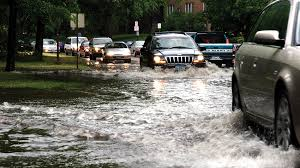

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s4e5/sample_submission.csv
/kaggle/input/playground-series-s4e5/train.csv
/kaggle/input/playground-series-s4e5/test.csv


## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_csv('/kaggle/input/playground-series-s4e5/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s4e5/test.csv')
#Reading the files.

## EDA - Exploratory Data Analysis

In [4]:
train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [5]:
test.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5


In [6]:
train.shape

(1117957, 22)

In [7]:
test.shape

(745305, 21)

In [16]:
train.isnull().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [17]:
test.isnull().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
dtype: int64

In [8]:
df=pd.concat([train,test])
#Merging the files.

In [9]:
df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [10]:
df.shape

(1863262, 22)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1863262 entries, 0 to 745304
Data columns (total 22 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   id                               int64  
 1   MonsoonIntensity                 int64  
 2   TopographyDrainage               int64  
 3   RiverManagement                  int64  
 4   Deforestation                    int64  
 5   Urbanization                     int64  
 6   ClimateChange                    int64  
 7   DamsQuality                      int64  
 8   Siltation                        int64  
 9   AgriculturalPractices            int64  
 10  Encroachments                    int64  
 11  IneffectiveDisasterPreparedness  int64  
 12  DrainageSystems                  int64  
 13  CoastalVulnerability             int64  
 14  Landslides                       int64  
 15  Watersheds                       int64  
 16  DeterioratingInfrastructure      int64  
 17  PopulationScor

In [12]:
df.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.863262e+06,1.863262e+06,1.863262e+06,1.863262e+06,1.863262e+06,1.863262e+06,1.863262e+06,1.863262e+06,1.863262e+06,1.863262e+06,...,1.863262e+06,1.863262e+06,1.863262e+06,1.863262e+06,1.863262e+06,1.863262e+06,1.863262e+06,1.863262e+06,1.863262e+06,1.117957e+06
mean,9.316305e+05,4.919114e+00,4.928117e+00,4.957204e+00,4.943778e+00,4.940879e+00,4.933865e+00,4.956914e+00,4.927735e+00,4.943695e+00,...,4.945737e+00,4.955283e+00,4.929874e+00,4.929707e+00,4.925969e+00,4.927295e+00,4.949885e+00,4.940434e+00,4.940970e+00,5.044803e-01
std,5.378776e+05,2.056351e+00,2.093974e+00,2.072001e+00,2.052055e+00,2.082761e+00,2.058342e+00,2.085565e+00,2.066839e+00,2.070490e+00,...,2.072334e+00,2.088854e+00,2.078575e+00,2.082776e+00,2.065143e+00,2.073982e+00,2.067574e+00,2.080325e+00,2.089166e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,4.658152e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,9.316305e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,1.397446e+06,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.863261e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.900000e+01,2.200000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [13]:
df.corr(numeric_only=True)

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
id,1.000000,-0.001244,0.000030,0.000794,0.000581,-0.000218,0.000037,0.000480,-0.000110,0.000482,...,-0.000228,0.000204,-0.000522,0.000927,-0.000146,0.000252,-0.000299,-0.000443,0.000869,-0.000184
MonsoonIntensity,-0.001244,1.000000,-0.008001,-0.007884,-0.007447,-0.008628,-0.006714,-0.008516,-0.007343,-0.008975,...,-0.008612,-0.010670,-0.009051,-0.009332,-0.008554,-0.008896,-0.007778,-0.007823,-0.008519,0.189098
TopographyDrainage,0.000030,-0.008001,1.000000,-0.010162,-0.008375,-0.011063,-0.009513,-0.008243,-0.009041,-0.009987,...,-0.010909,-0.013148,-0.010221,-0.011176,-0.006663,-0.010379,-0.010441,-0.011095,-0.011695,0.187635
RiverManagement,0.000794,-0.007884,-0.010162,1.000000,-0.009543,-0.012183,-0.008827,-0.008902,-0.009797,-0.010470,...,-0.010427,-0.011529,-0.009831,-0.010189,-0.006603,-0.008102,-0.010024,-0.008691,-0.011611,0.187131
Deforestation,0.000581,-0.007447,-0.008375,-0.009543,1.000000,-0.012420,-0.009405,-0.009787,-0.009839,-0.009728,...,-0.010614,-0.012344,-0.009137,-0.010421,-0.007839,-0.012095,-0.011312,-0.010540,-0.010167,0.184001
Urbanization,-0.000218,-0.008628,-0.011063,-0.012183,-0.012420,1.000000,-0.011729,-0.011425,-0.009460,-0.009967,...,-0.012246,-0.014020,-0.011214,-0.011722,-0.010301,-0.011671,-0.011075,-0.012159,-0.012479,0.180861
ClimateChange,0.000037,-0.006714,-0.009513,-0.008827,-0.009405,-0.011729,1.000000,-0.008465,-0.009111,-0.011391,...,-0.010779,-0.012927,-0.009710,-0.011009,-0.007327,-0.011005,-0.008685,-0.011385,-0.011263,0.184761
DamsQuality,0.000480,-0.008516,-0.008243,-0.008902,-0.009787,-0.011425,-0.008465,1.000000,-0.009334,-0.010038,...,-0.010223,-0.012019,-0.010059,-0.009202,-0.008826,-0.008864,-0.009153,-0.011235,-0.011526,0.187996
Siltation,-0.000110,-0.007343,-0.009041,-0.009797,-0.009839,-0.009460,-0.009111,-0.009334,1.000000,-0.009709,...,-0.010593,-0.011130,-0.009828,-0.009752,-0.006593,-0.009217,-0.009446,-0.010140,-0.008527,0.186789
AgriculturalPractices,0.000482,-0.008975,-0.009987,-0.010470,-0.009728,-0.009967,-0.011391,-0.010038,-0.009709,1.000000,...,-0.011195,-0.011306,-0.010378,-0.010003,-0.009217,-0.009542,-0.012133,-0.010999,-0.011321,0.183366


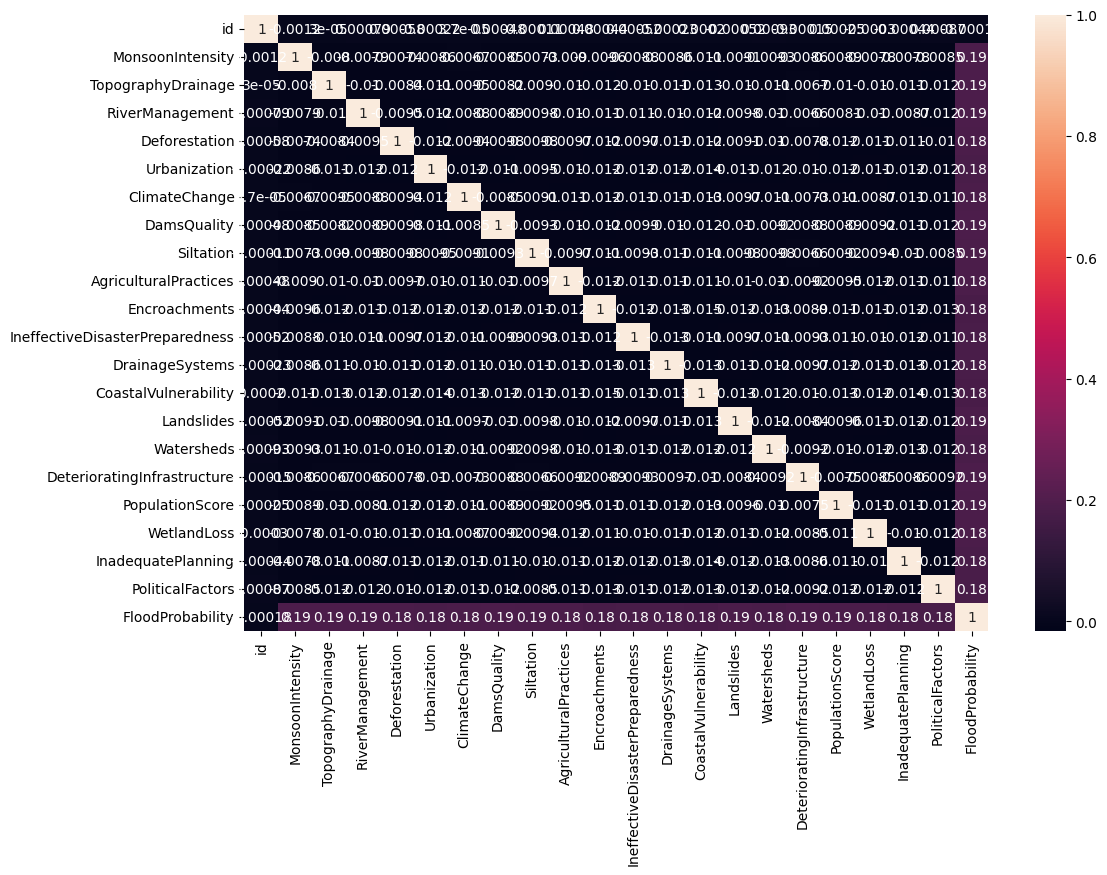

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot=True);

## Data Visualization

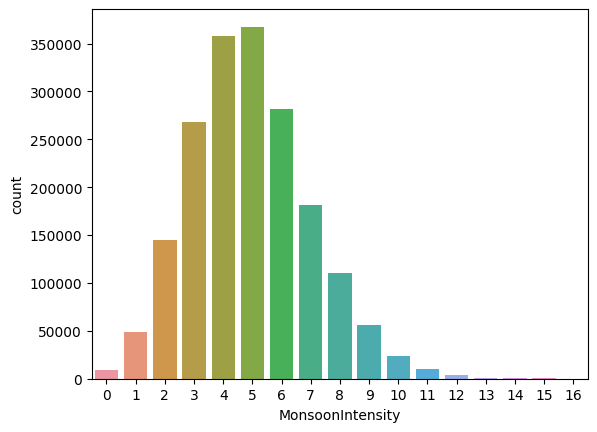

In [19]:
sns.countplot(x=df['MonsoonIntensity']);

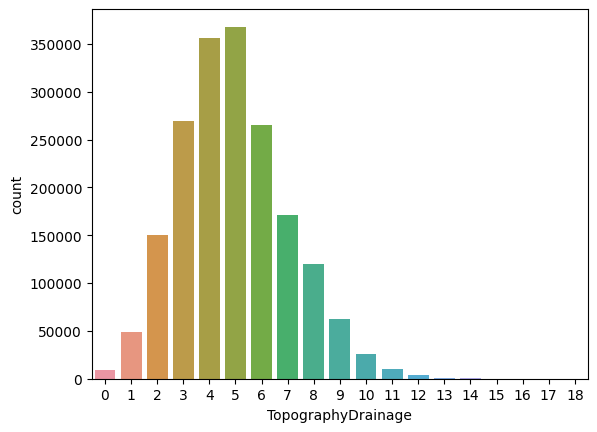

In [21]:
sns.countplot(x=df['TopographyDrainage']);

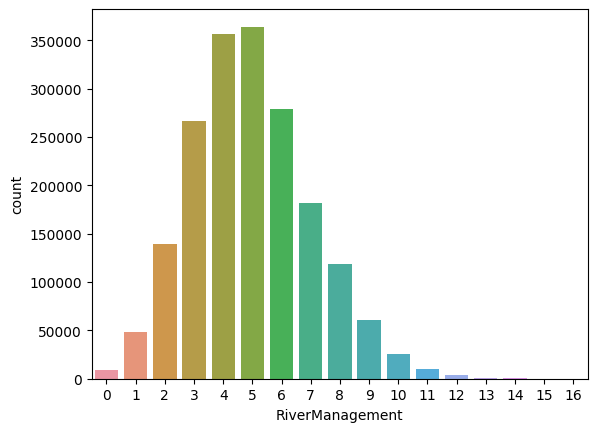

In [23]:
sns.countplot(x=df['RiverManagement']);

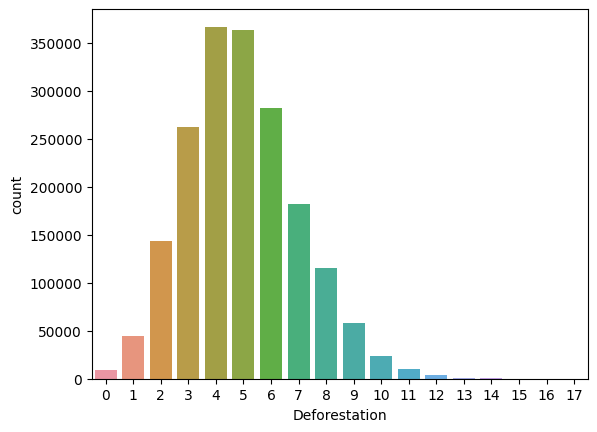

In [25]:
sns.countplot(x=df['Deforestation']);

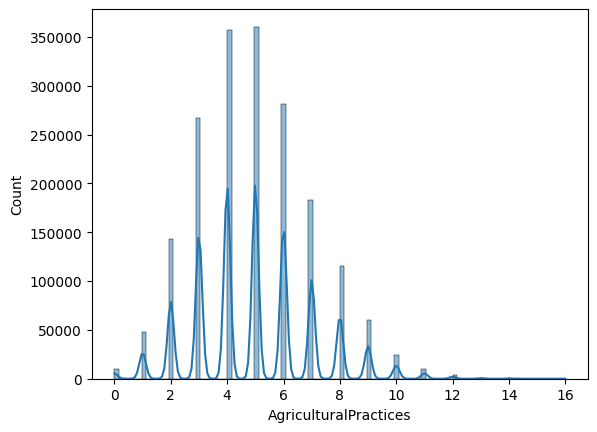

In [28]:
sns.histplot(x=df['AgriculturalPractices'], kde=True, bins=100);

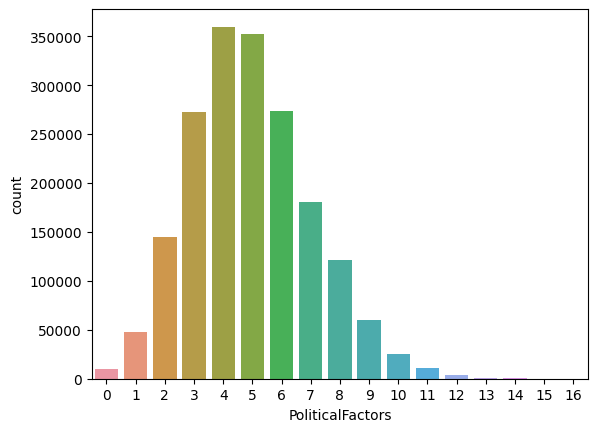

In [30]:
sns.countplot(x=df['PoliticalFactors']);

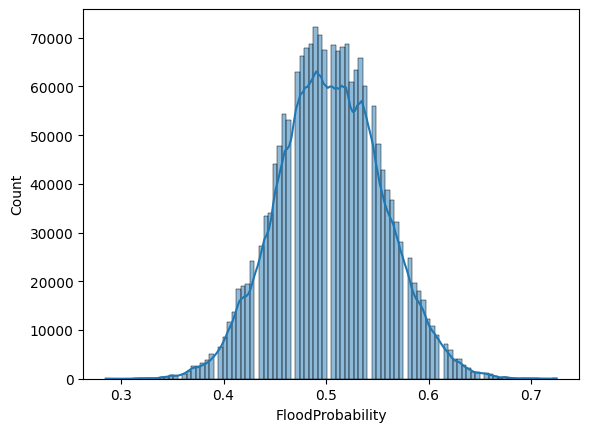

In [34]:
sns.histplot(x=df['FloodProbability'], kde=True, bins=100);

## Modelling

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [36]:
train=df[:1117957]
test=df[1117957:]

In [37]:
x=train.drop('FloodProbability', axis=1)
y=train[['FloodProbability']]

In [38]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.20, random_state=42)

In [39]:
lr=LinearRegression()
model=lr.fit(x_train, y_train)
pred=lr.predict(x_test)
rmse=mean_squared_error(y_test, pred)**.5
r2=r2_score(y_test, pred)

print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

Root Mean Squared Error: 0.020080003249804697
R2 Score: 0.8448773580510154


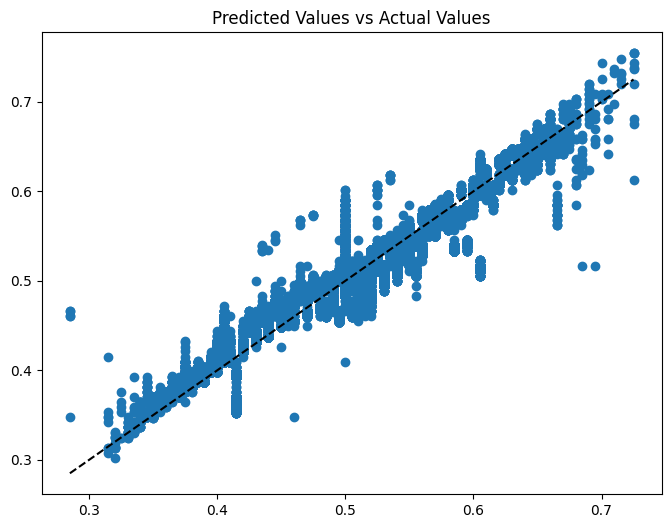

In [40]:
y_pred=model.predict(x_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title('Predicted Values vs Actual Values');
#for Linear Regression

In [41]:
feature_importance=pd.DataFrame({'Feature':x_train.columns, 'Coefs':lr.coef_[0]})

In [42]:
feature_importance=feature_importance.sort_values(by='Coefs', ascending=False)

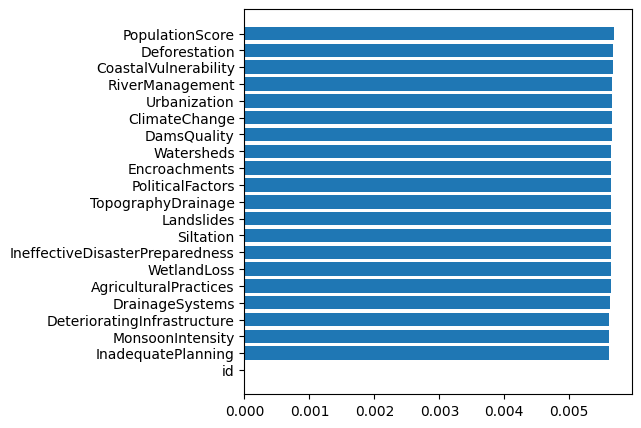

In [43]:
plt.figure(figsize=(5,5))
plt.barh(feature_importance['Feature'],feature_importance['Coefs'])
plt.gca().invert_yaxis()

In [44]:
residuals=y_test-pred

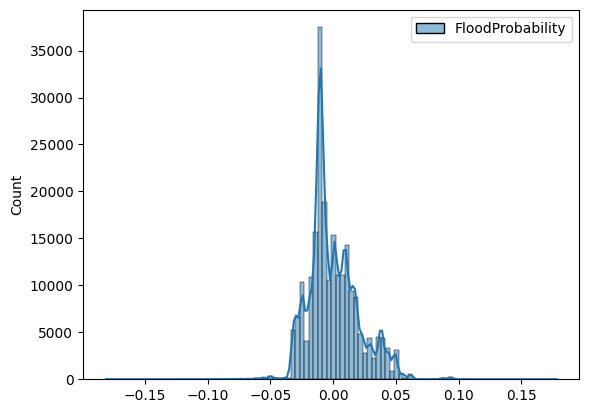

In [45]:
sns.histplot(residuals, kde=True,bins=100);

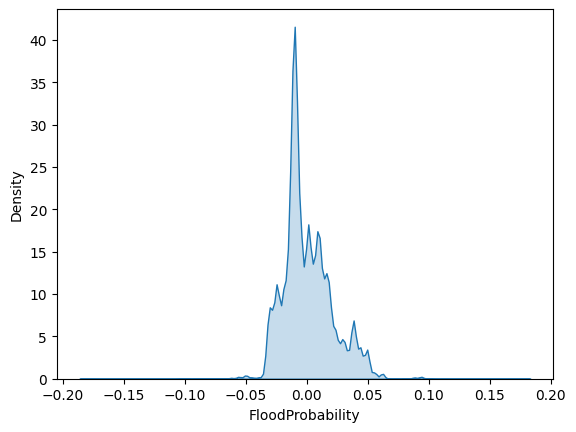

In [46]:
sns.kdeplot(x=residuals['FloodProbability'], fill=True);

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        mlp_regressor = MLPRegressor()

        algos=[L,R,Lass,E,ETR,GBR,ada,dt,xgb,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting',
                    'AdaBoost','Decision Tree','XGBRegressor','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
        
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
   
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [50]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Ridge,0.844877,0.020080,0.015792
Linear,0.844877,0.020080,0.015792
XGBRegressor,0.808555,0.022307,0.017614
Gradient Boosting,0.614290,0.031663,0.026065
AdaBoost,0.523998,0.035175,0.028413
Decision Tree,0.038564,0.049990,0.039792
Lasso,-0.000001,0.050983,0.040892
ElasticNet,-0.000001,0.050983,0.040892
mlp_regressor,-0.000397,0.050993,0.040909
Extra Tree,-0.020985,0.051515,0.041015


## Test Data Prediction

In [51]:
r=Ridge()
r.fit(x_train, y_train)
x_test=test.drop('FloodProbability', axis=1)

In [52]:
predictions=r.predict(x_test)

In [53]:
predictions1=pd.DataFrame()

In [54]:
predictions1['id']=test['id']

In [55]:
predictions1['FloodProbability']=predictions

In [56]:
predictions1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 745305 entries, 0 to 745304
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                745305 non-null  int64  
 1   FloodProbability  745305 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 17.1 MB


In [57]:
predictions1.to_csv('flood_submission.csv', index=False)

## Summary 

The training and test datasets were combined to improve the performance of the model. This step allowed all the data to be analyzed as a single whole. Various graphs were created to understand the characteristics and distributions of the dataset. These graphs helped in determining the relationships between the variables. The combined dataset was divided into training and test sets for training and testing the model. Usually, 80% training and 20% testing ratio was used. The data was trained with the selected regression model (e.g. Linear Regression, Ridge or Lasso). The model optimized the parameters during the learning process. Several metrics were used to evaluate the performance of the model. Residuals: Analysis of the prediction errors was done to evaluate the accuracy of the model. Coefficients: The learned coefficients of the model were examined to understand the effects of the variables on the prediction. Actual vs. Predicted Values ​​Plot: It was used to visualize the predictions of the model. This graph was important to evaluate how well the model performed. The trained model made predictions on the test dataset. These predictions were used to evaluate the model’s performance on real-world data. The prediction results were saved in a CSV file format.
This study covers the development of a regression model for flood prediction. The analyses and model evaluations provide important information that can help predict future flood events. Such models can play a critical role in disaster management and planning, and can contribute to better preparedness of communities for flood risk.